In [52]:
# =============================================================================
# PROJECT 01 - ANIMAL SHELTER OUTCOME PREDICTION
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context="notebook")

# Load the Austin Animal Shelter dataset
URL = "https://raw.githubusercontent.com/joestubbs/coe379L-fa25/main/datasets/unit01/project1.csv"
df = pd.read_csv(URL)

print("Shape:", df.shape)
print("Dataset loaded successfully!")
df.head()


Shape: (131165, 12)
Dataset loaded successfully!


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A680855,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
1,A680857,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
2,A680858,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
3,A680859,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
4,A680860,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black


In [53]:
# =============================================================================
# PART 1: EXPLORATORY DATA ANALYSIS (EDA) - 8 POINTS
# =============================================================================

# Step 1.1: Normalize column names for consistency
# Convert to lowercase, replace spaces/special chars with underscores
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(r'[^0-9a-zA-Z]+', '_', regex=True)
      .str.replace(r'_{2,}', '_', regex=True)
      .str.strip('_')
)

print("Normalized column names:")
print(df.columns.tolist())


Normalized column names:
['animal_id', 'date_of_birth', 'name', 'datetime', 'monthyear', 'outcome_type', 'outcome_subtype', 'animal_type', 'sex_upon_outcome', 'age_upon_outcome', 'breed', 'color']


In [54]:
# Step 1.2: Data Quality Assessment (1 point)
# - Identify shape, size of raw data
# - Get information about datatypes and check for conversion needs
# - Check for duplicate rows and missing data

print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Total records: {df.shape[0]:,}")
print(f"Total features: {df.shape[1]}")

print("\n=== DATA TYPES & INFO ===")
print(df.info())

print("\n=== DUPLICATE ANALYSIS ===")
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

print("\n=== MISSING DATA ANALYSIS ===")
missing_data = df.isna().sum()
print("Missing values per column:")
print(missing_data)

# Check for blank strings in object columns
print("\n=== BLANK STRING ANALYSIS ===")
for col in df.select_dtypes(include='object').columns:
    blanks = (df[col].astype(str).str.strip() == "").sum()
    if blanks:
        print(f"Blank strings in {col}: {blanks}")

print("\n=== DATA TYPE CONVERSION NOTES ===")
print("- All columns are currently 'object' type")
print("- datetime column needs conversion to datetime type")
print("- age_upon_outcome needs conversion to numeric (days)")
print("- Categorical columns will be handled with one-hot encoding")


=== DATASET OVERVIEW ===
Dataset shape: (131165, 12)
Total records: 131,165
Total features: 12

=== DATA TYPES & INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131165 entries, 0 to 131164
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   animal_id         131165 non-null  object
 1   date_of_birth     131165 non-null  object
 2   name              93658 non-null   object
 3   datetime          131165 non-null  object
 4   monthyear         131165 non-null  object
 5   outcome_type      131125 non-null  object
 6   outcome_subtype   65810 non-null   object
 7   animal_type       131165 non-null  object
 8   sex_upon_outcome  131165 non-null  object
 9   age_upon_outcome  131165 non-null  object
 10  breed             131165 non-null  object
 11  color             131165 non-null  object
dtypes: object(12)
memory usage: 12.0+ MB
None

=== DUPLICATE ANALYSIS ===
Duplicate rows: 17

=== MISSING DA

In [55]:
# Step 1.3: Data Cleaning & Missing Value Treatment (1 point)
# - Drop duplicate rows
# - Handle missing values with appropriate methods (mean, median, mode)

print("=== DATA CLEANING PROCESS ===")

# Remove duplicate rows
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Dropped {before - after} duplicate rows")
print(f"Records remaining: {after:,}")

# Drop rows with missing target variable (outcome_type)
print(f"\nDropping rows with missing outcome_type...")
df = df.dropna(subset=["outcome_type"])
print(f"Records after removing missing outcomes: {len(df):,}")

# Fill missing values in categorical columns with mode (most frequent value)
print(f"\nFilling missing values in categorical columns with mode...")
categorical_columns = ["sex_upon_outcome", "animal_type", "color", "outcome_subtype", "name"]
for col in categorical_columns:
    if col in df.columns:
        mode_value = df[col].mode(dropna=True)
        if not mode_value.empty:
            df[col] = df[col].fillna(mode_value[0])
            print(f"  - {col}: filled with mode '{mode_value[0]}'")

print("\n=== MISSING DATA AFTER CLEANING ===")
missing_after = df.isna().sum()
print(missing_after)

print(f"\nCleaning Summary:")
print(f"- Original records: {before:,}")
print(f"- After removing duplicates: {after:,}")
print(f"- After removing missing outcomes: {len(df):,}")
print(f"- Final dataset ready for analysis: {len(df):,} records")


=== DATA CLEANING PROCESS ===
Dropped 17 duplicate rows
Records remaining: 131,148

Dropping rows with missing outcome_type...
Records after removing missing outcomes: 131,108

Filling missing values in categorical columns with mode...
  - sex_upon_outcome: filled with mode 'Neutered Male'
  - animal_type: filled with mode 'Dog'
  - color: filled with mode 'Black/White'
  - outcome_subtype: filled with mode 'Partner'
  - name: filled with mode 'Luna'

=== MISSING DATA AFTER CLEANING ===
animal_id           0
date_of_birth       0
name                0
datetime            0
monthyear           0
outcome_type        0
outcome_subtype     0
animal_type         0
sex_upon_outcome    0
age_upon_outcome    0
breed               0
color               0
dtype: int64

Cleaning Summary:
- Original records: 131,165
- After removing duplicates: 131,148
- After removing missing outcomes: 131,108
- Final dataset ready for analysis: 131,108 records


In [56]:
# Step 1.4: Data Type Conversion (1 point)
# Convert age_upon_outcome to numeric days for analysis

import re
import numpy as np

print("=== AGE CONVERSION TO NUMERIC DAYS ===")

def age_to_days(age_string: str):
    """
    Convert age strings like '2 years', '6 months' to numeric days
    Returns NaN for invalid formats
    """
    if pd.isna(age_string):
        return np.nan
    
    age_string = str(age_string).lower().strip()
    
    # Use regex to extract number and unit
    pattern = r"^\s*([0-9]*\.?[0-9]+)\s*(year|years|month|months|week|weeks|day|days)\s*$"
    match = re.match(pattern, age_string)
    
    if not match:
        return np.nan
    
    number = float(match.group(1))
    unit = match.group(2)
    
    # Convert to days based on unit
    if "day" in unit:
        return number
    elif "week" in unit:
        return number * 7
    elif "month" in unit:
        return number * 30  # Approximate
    elif "year" in unit:
        return number * 365  # Approximate
    else:
        return np.nan

# Apply conversion
print("Converting age_upon_outcome to numeric days...")
df["age_in_days"] = df["age_upon_outcome"].apply(age_to_days)

# Show conversion results
print(f"Age conversion completed!")
print(f"Valid age conversions: {df['age_in_days'].notna().sum():,}")
print(f"Invalid age conversions: {df['age_in_days'].isna().sum():,}")

print("\nSample conversions:")
print(df[["age_upon_outcome", "age_in_days"]].head(10))

print(f"\nAge statistics (in days):")
print(df["age_in_days"].describe())


=== AGE CONVERSION TO NUMERIC DAYS ===
Converting age_upon_outcome to numeric days...
Age conversion completed!
Valid age conversions: 131,108
Invalid age conversions: 0

Sample conversions:
  age_upon_outcome  age_in_days
0          2 weeks         14.0
1          2 weeks         14.0
2          2 weeks         14.0
3          2 weeks         14.0
4          2 weeks         14.0
5          2 weeks         14.0
6          2 weeks         14.0
7          2 weeks         14.0
8         2 months         60.0
9          4 weeks         28.0

Age statistics (in days):
count    131108.000000
mean        574.969163
std         876.400139
min           1.000000
25%          60.000000
50%         240.000000
75%         730.000000
max       10950.000000
Name: age_in_days, dtype: float64


In [57]:
# Step 1.5: Drop Irrelevant Columns (1 point)
# Remove columns that won't be used in modeling

print("=== REMOVING IRRELEVANT COLUMNS ===")

# Identify columns to remove (IDs, redundant date columns)
irrelevant_columns = ["animal_id", "date_of_birth", "datetime", "monthyear"]
columns_to_remove = [c for c in irrelevant_columns if c in df.columns]

print(f"Columns to remove: {columns_to_remove}")
print(f"Columns before removal: {len(df.columns)}")

# Remove irrelevant columns
df = df.drop(columns=columns_to_remove)

print(f"Columns after removal: {len(df.columns)}")
print("Remaining columns:", list(df.columns))

print(f"\nNote: 'breed' column kept for EDA but will be dropped before modeling")
print(f"as specified in project requirements (Part 2).")


=== REMOVING IRRELEVANT COLUMNS ===
Columns to remove: ['animal_id', 'date_of_birth', 'datetime', 'monthyear']
Columns before removal: 13
Columns after removal: 9
Remaining columns: ['name', 'outcome_type', 'outcome_subtype', 'animal_type', 'sex_upon_outcome', 'age_upon_outcome', 'breed', 'color', 'age_in_days']

Note: 'breed' column kept for EDA but will be dropped before modeling
as specified in project requirements (Part 2).


=== UNIVARIATE ANALYSIS & VISUALIZATIONS ===
Creating distribution plots for key variables...


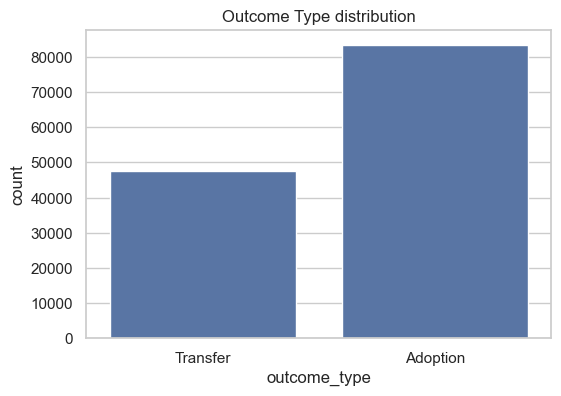

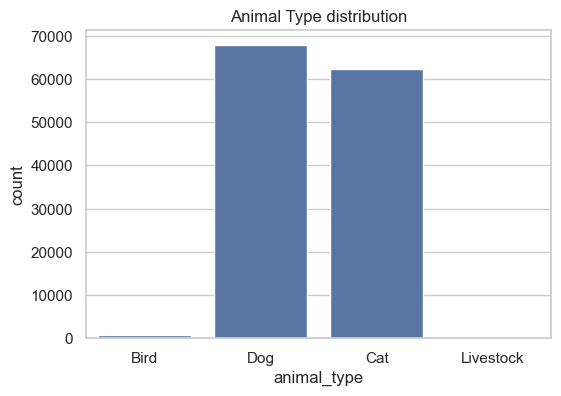

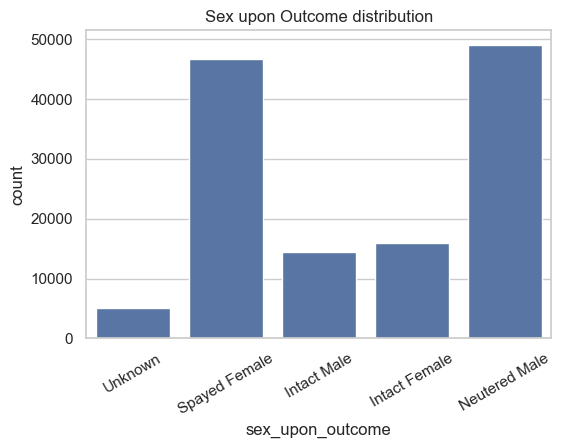

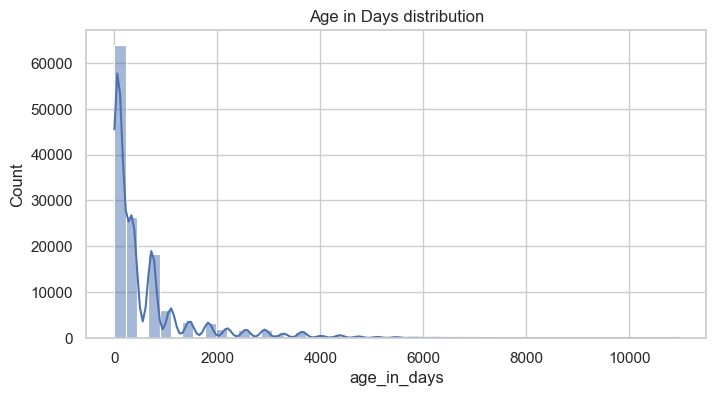

Loading original data for time series analysis...
Converting datetime column with mixed formats...
Sample datetime values:
['2014-06-10T00:00:00-05:00', '2014-06-10T00:00:00-05:00', '2014-06-10T00:00:00-05:00', '2014-06-10T00:00:00-05:00', '2014-06-10T00:00:00-05:00', '2014-06-10T00:00:00-05:00', '2014-06-10T00:00:00-05:00', '2014-06-10T00:00:00-05:00', '2014-07-11T00:00:00-05:00', '2014-07-12T00:00:00-05:00']
Successfully converted with UTC timezone handling
Datetime conversion successful!
Using 3,206 records for time series analysis


/var/folders/fz/jqs38pys1sx842f5xr07p3240000gn/T/ipykernel_1280/943670543.py:85: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_original['year_month'] = df_original['datetime'].dt.to_period('M')


<Figure size 1200x600 with 0 Axes>

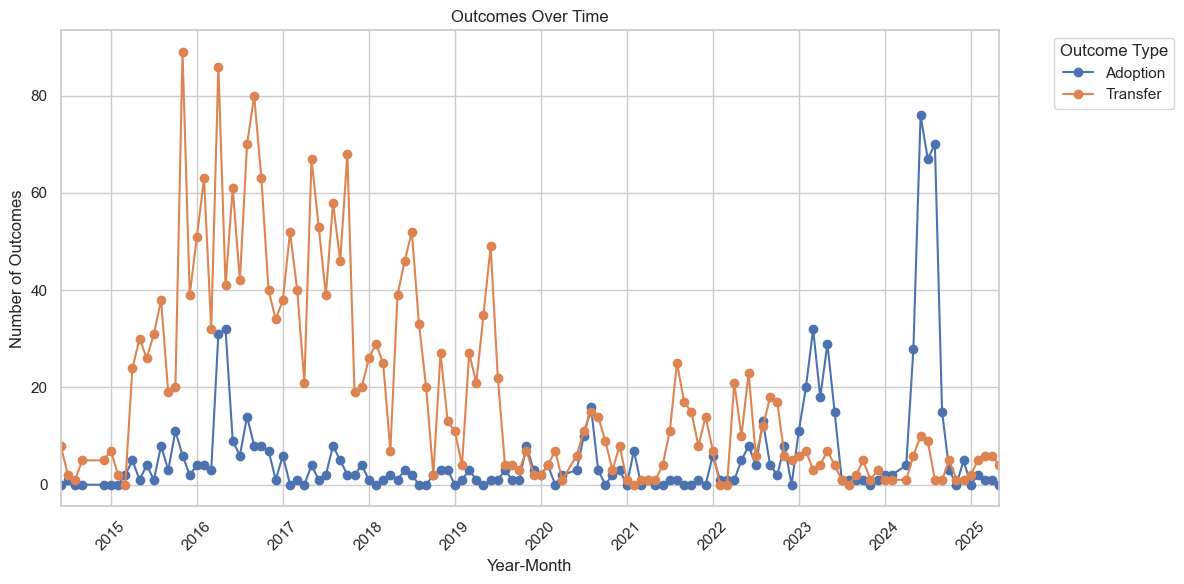

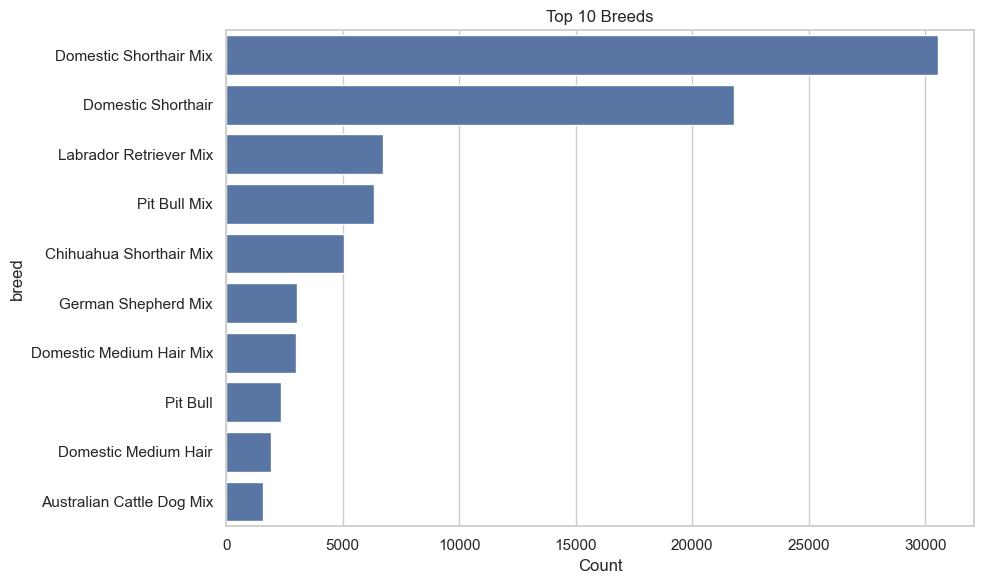

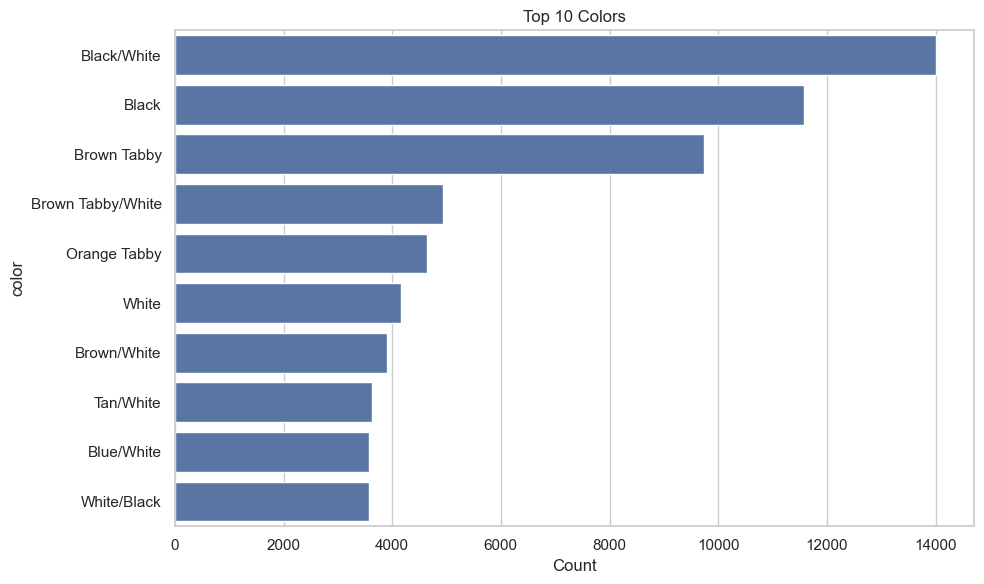

In [58]:

# Step 1.6: Univariate Analysis & Visualizations (2 points)
# Create visualizations to understand data distributions and patterns

import matplotlib.pyplot as plt
import seaborn as sns

print("=== UNIVARIATE ANALYSIS & VISUALIZATIONS ===")
print("Creating distribution plots for key variables...")

plt.figure(figsize=(6,4))
sns.countplot(x="outcome_type", data=df)
plt.title("Outcome Type distribution")
plt.show()

if "animal_type" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="animal_type", data=df)
    plt.title("Animal Type distribution")
    plt.show()

if "sex_upon_outcome" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="sex_upon_outcome", data=df)
    plt.title("Sex upon Outcome distribution")
    plt.xticks(rotation=30)
    plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df["age_in_days"].dropna(), bins=50, kde=True)
plt.title("Age in Days distribution")
plt.show()

# Additional EDA: Outcomes over time, top breeds, and top colors

# 1. Outcomes over time
# Note: We need to reload the original data for time analysis since datetime was dropped
print("Loading original data for time series analysis...")
df_original = pd.read_csv(URL)
df_original.columns = (
    df_original.columns
      .str.strip()
      .str.lower()
      .str.replace(r'[^0-9a-zA-Z]+', '_', regex=True)
      .str.replace(r'_{2,}', '_', regex=True)
      .str.strip('_')
)

plt.figure(figsize=(12,6))
# Handle mixed datetime formats with timezone issues
print("Converting datetime column with mixed formats...")

# First, let's see what the datetime column looks like
print("Sample datetime values:")
print(df_original['datetime'].head(10).tolist())

# Use a more robust approach to handle mixed timezones
try:
    # Try converting with utc=True to handle timezone issues
    df_original['datetime'] = pd.to_datetime(df_original['datetime'], errors='coerce', utc=True)
    print("Successfully converted with UTC timezone handling")
except:
    # If that fails, try without timezone handling
    print("UTC conversion failed, trying without timezone handling...")
    df_original['datetime'] = pd.to_datetime(df_original['datetime'], errors='coerce')
    
    # If still object dtype, try manual conversion
    if df_original['datetime'].dtype == 'object':
        print("Manual conversion needed...")
        def safe_datetime_convert(x):
            try:
                # Remove timezone info if present and convert
                if isinstance(x, str):
                    # Remove timezone suffix if present
                    x_clean = x.split('+')[0].split('-')[0].split('Z')[0]
                    return pd.to_datetime(x_clean)
                return pd.to_datetime(x)
            except:
                return pd.NaT
        
        df_original['datetime'] = df_original['datetime'].apply(safe_datetime_convert)

# Check if conversion was successful
if df_original['datetime'].dtype.name.startswith('datetime'):
    print("Datetime conversion successful!")
    df_original['year_month'] = df_original['datetime'].dt.to_period('M')
    
    # Check for any failed conversions
    failed_conversions = df_original['datetime'].isna().sum()
    if failed_conversions > 0:
        print(f"Warning: {failed_conversions} datetime conversions failed and were set to NaT")
    
    # Remove rows with failed datetime conversions for time series analysis
    df_time_clean = df_original.dropna(subset=['datetime', 'outcome_type'])
    print(f"Using {len(df_time_clean):,} records for time series analysis")
    
    outcome_time = df_time_clean.groupby(['year_month', 'outcome_type']).size().unstack(fill_value=0)
    outcome_time.plot(kind='line', figsize=(12,6), marker='o')
    plt.title('Outcomes Over Time')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Outcomes')
    plt.legend(title='Outcome Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Datetime conversion failed. Skipping time series plot.")
    print("Creating alternative visualization using monthyear column...")
    
    # Use monthyear column as alternative
    if 'monthyear' in df_original.columns:
        plt.figure(figsize=(12,6))
        outcome_time_alt = df_original.groupby(['monthyear', 'outcome_type']).size().unstack(fill_value=0)
        outcome_time_alt.plot(kind='line', figsize=(12,6), marker='o')
        plt.title('Outcomes Over Time (using MonthYear)')
        plt.xlabel('Month-Year')
        plt.ylabel('Number of Outcomes')
        plt.legend(title='Outcome Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("No suitable time column found for time series analysis.")

# 2. Top breeds
plt.figure(figsize=(10,6))
top_breeds = df['breed'].value_counts().head(10)
sns.barplot(x=top_breeds.values, y=top_breeds.index)
plt.title('Top 10 Breeds')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

# 3. Top colors
plt.figure(figsize=(10,6))
top_colors = df['color'].value_counts().head(10)
sns.barplot(x=top_colors.values, y=top_colors.index)
plt.title('Top 10 Colors')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

In [59]:
# Step 1.7: One-Hot Encoding Demonstration (1 point)
# Demonstrate one-hot encoding on categorical variables

print("=== ONE-HOT ENCODING DEMONSTRATION ===")

# Create a copy for demonstration
df_demo = df.copy()
df_demo["outcome_type"] = df_demo["outcome_type"].astype("category")

# Identify categorical columns (exclude target variable)
categorical_columns = df_demo.select_dtypes(include=["object", "category"]).columns.tolist()
if "outcome_type" in categorical_columns:
    categorical_columns.remove("outcome_type")

print(f"Categorical columns to encode: {categorical_columns}")

# Apply one-hot encoding
df_onehot_demo = pd.get_dummies(df_demo, columns=categorical_columns, drop_first=False)

print(f"Original shape: {df_demo.shape}")
print(f"After one-hot encoding: {df_onehot_demo.shape}")
print(f"Number of new features created: {df_onehot_demo.shape[1] - df_demo.shape[1]}")

print("\nSample of one-hot encoded data:")
print(df_onehot_demo.head(3))

print(f"\nNote: This demonstrates the feature expansion that occurs with one-hot encoding.")
print(f"The actual encoding will be handled by sklearn's preprocessing pipeline.")


=== ONE-HOT ENCODING DEMONSTRATION ===
Categorical columns to encode: ['name', 'outcome_subtype', 'animal_type', 'sex_upon_outcome', 'age_upon_outcome', 'breed', 'color']
Original shape: (131108, 9)
After one-hot encoding: (131108, 28678)
Number of new features created: 28669

Sample of one-hot encoded data:
  outcome_type  age_in_days  name_#1  name_#2  name_#3  name_#3 Athena  \
0     Transfer         14.0    False    False    False           False   
1     Transfer         14.0    False    False    False           False   
2     Transfer         14.0    False    False    False           False   

   name_#4  name_#5  name_#5 Buttercup  name_#6  Ivy  ...  color_Yellow/Brown  \
0    False    False              False         False  ...               False   
1    False    False              False         False  ...               False   
2    False    False              False         False  ...               False   

   color_Yellow/Cream  color_Yellow/Gray  color_Yellow/Green  \
0   

In [60]:
# =============================================================================
# PART 2: CLASSIFICATION MODELS - 7 POINTS
# =============================================================================

# Step 2.1: Data Preparation for Modeling (1 point)
# - Drop breed column as specified
# - Split data into training and test sets with stratification

from sklearn.model_selection import train_test_split

print("=== PREPARING DATA FOR MODELING ===")

# Drop breed column as specified in project requirements
print("Dropping 'breed' column as specified in Part 2 requirements...")
df_model = df.drop(columns=["breed"]) if "breed" in df.columns else df.copy()
print(f"Features after dropping breed: {list(df_model.columns)}")

# Separate features (X) and target (y)
y = df_model["outcome_type"]  # Target variable
X = df_model.drop(columns=["outcome_type"])  # Features

print(f"\nTarget variable distribution:")
print(y.value_counts())
print(f"\nTarget variable proportions:")
print(y.value_counts(normalize=True))

# Split data with stratification to maintain class proportions
print(f"\nSplitting data into train/test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,           # 20% for testing
    random_state=42,         # For reproducibility
    stratify=y               # Maintain class proportions
)

print(f"Training set size: {X_train.shape[0]:,} samples")
print(f"Test set size: {X_test.shape[0]:,} samples")

print(f"\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print(f"\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))

print(f"\nStratification successful - class proportions maintained!")


=== PREPARING DATA FOR MODELING ===
Dropping 'breed' column as specified in Part 2 requirements...
Features after dropping breed: ['name', 'outcome_type', 'outcome_subtype', 'animal_type', 'sex_upon_outcome', 'age_upon_outcome', 'color', 'age_in_days']

Target variable distribution:
outcome_type
Adoption    83580
Transfer    47528
Name: count, dtype: int64

Target variable proportions:
outcome_type
Adoption    0.63749
Transfer    0.36251
Name: proportion, dtype: float64

Splitting data into train/test sets...
Training set size: 104,886 samples
Test set size: 26,222 samples

Class distribution in training set:
outcome_type
Adoption    0.637492
Transfer    0.362508
Name: proportion, dtype: float64

Class distribution in test set:
outcome_type
Adoption    0.63748
Transfer    0.36252
Name: proportion, dtype: float64

Stratification successful - class proportions maintained!


In [61]:
# Step 2.2: Preprocessing Pipeline Setup
# Create preprocessing pipeline for categorical and numeric features

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

print("=== SETTING UP PREPROCESSING PIPELINE ===")

# Identify feature types
numeric_features = [c for c in X.columns if c == "age_in_days"]
categorical_features = [c for c in X.columns if c != "age_in_days"]

print(f"Numeric features: {numeric_features}")
print(f"Categorical features: {categorical_features}")

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        # Numeric features: impute missing values with median, then scale
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler()),
        ]), numeric_features),
        
        # Categorical features: impute missing values with mode, then one-hot encode
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore")),
        ]), categorical_features),
    ],
    remainder="drop"  # Drop any columns not explicitly handled
)

print("Preprocessing pipeline created successfully!")
print("Pipeline will:")
print("  - Handle missing values in numeric features with median")
print("  - Scale numeric features to mean=0, std=1")
print("  - Handle missing values in categorical features with mode")
print("  - One-hot encode categorical features")


=== SETTING UP PREPROCESSING PIPELINE ===
Numeric features: ['age_in_days']
Categorical features: ['name', 'outcome_subtype', 'animal_type', 'sex_upon_outcome', 'age_upon_outcome', 'color']
Preprocessing pipeline created successfully!
Pipeline will:
  - Handle missing values in numeric features with median
  - Scale numeric features to mean=0, std=1
  - Handle missing values in categorical features with mode
  - One-hot encode categorical features


In [62]:
# Step 2.3: Model 1 - K-Nearest Neighbor Classifier (1 point)
# Basic KNN with k=5

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

print("=== MODEL 1: K-NEAREST NEIGHBOR CLASSIFIER (k=5) ===")

# Create KNN pipeline
knn_pipe = Pipeline([
    ("pre", preprocessor), 
    ("clf", KNeighborsClassifier(n_neighbors=5))
])

print("Training KNN model...")
knn_pipe.fit(X_train, y_train)

print("Making predictions on test set...")
y_pred_knn = knn_pipe.predict(X_test)

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn, digits=3))


=== MODEL 1: K-NEAREST NEIGHBOR CLASSIFIER (k=5) ===
Training KNN model...
Making predictions on test set...

KNN Classification Report:
              precision    recall  f1-score   support

    Adoption      0.866     0.931     0.897     16716
    Transfer      0.860     0.748     0.800      9506

    accuracy                          0.864     26222
   macro avg      0.863     0.839     0.849     26222
weighted avg      0.864     0.864     0.862     26222



In [63]:
# Step 2.4: Model 2 - KNN with GridSearchCV (2 points)
# Optimized KNN using grid search with limited columns to prevent crashes

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Create a subset with only the specified columns to prevent crashes
# Use age_in_days instead of age_upon_outcome since it's already converted to numeric
X_train_limited = X_train[['animal_type', 'sex_upon_outcome', 'age_in_days']].copy()
X_test_limited = X_test[['animal_type', 'sex_upon_outcome', 'age_in_days']].copy()

# Create a lightweight preprocessor for limited columns
numeric_features_limited = ['age_in_days']  # This is already numeric
categorical_features_limited = ['animal_type', 'sex_upon_outcome']

preprocessor_limited = ColumnTransformer(
    transformers=[
        ("num",  Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler()),
        ]), numeric_features_limited),
        ("cat",  Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore")),
        ]), categorical_features_limited),
    ],
    remainder="drop"
)

# Create a lightweight KNN pipeline for grid search
knn_grid_pipe = Pipeline([("pre", preprocessor_limited), ("clf", KNeighborsClassifier())])

# Reduced parameter grid to prevent crashes
param_grid = {
    "clf__n_neighbors": [3, 5, 7],  # Reduced from [3, 5, 7, 9, 11]
    "clf__weights": ["uniform"]     # Only uniform to reduce computation
}

# Grid search with limited parameters and no parallel processing
grid_search = GridSearchCV(
    estimator=knn_grid_pipe,
    param_grid=param_grid,
    cv=3,                  # 3-fold cross-validation
    scoring="f1_macro",
    n_jobs=1               # Single job to prevent crashes
)

# Use the limited training set
print("Training Model 2 with limited columns to prevent crashes...")
grid_search.fit(X_train_limited, y_train)

print("Best Parameters from Grid Search:", grid_search.best_params_)
grid_predictions = grid_search.predict(X_test_limited)
print("Grid Search KNN Classifier Report (Limited Columns):")
print(classification_report(y_test, grid_predictions, digits=3))


Training Model 2 with limited columns to prevent crashes...
Best Parameters from Grid Search: {'clf__n_neighbors': 7, 'clf__weights': 'uniform'}
Grid Search KNN Classifier Report (Limited Columns):
              precision    recall  f1-score   support

    Adoption      0.843     0.946     0.891     16716
    Transfer      0.879     0.689     0.773      9506

    accuracy                          0.853     26222
   macro avg      0.861     0.818     0.832     26222
weighted avg      0.856     0.853     0.848     26222



In [64]:
# Step 2.5: Model 3 - Perceptron (Linear Classifier) (1 point)
# Linear classification model

from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report

# Pipeline with preprocessor from earlier cells
perceptron_pipe = Pipeline([
    ("pre", preprocessor),
    ("clf", Perceptron(
        max_iter=1000,
        random_state=42,
        n_jobs=-1        # parallelize across CPU cores
    ))
])

# Fit on full training set
perceptron_pipe.fit(X_train, y_train)

# Predict on test set
y_pred_perceptron = perceptron_pipe.predict(X_test)

print("Perceptron:\n", classification_report(y_test, y_pred_perceptron, digits=3))


Perceptron:
               precision    recall  f1-score   support

    Adoption      0.863     0.887     0.875     16716
    Transfer      0.791     0.752     0.771      9506

    accuracy                          0.838     26222
   macro avg      0.827     0.819     0.823     26222
weighted avg      0.837     0.838     0.837     26222



In [65]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd

def get_metrics(model_name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="macro", zero_division=0
    )
    return {"Model": model_name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1-Score": f1}

results = []
results.append(get_metrics("KNN (k=5)", y_test, knn_pipe.predict(X_test)))
results.append(get_metrics("KNN (Grid - Limited)", y_test, grid_search.predict(X_test_limited)))
results.append(get_metrics("Perceptron", y_test, perceptron_pipe.predict(X_test)))

comparison_df = pd.DataFrame(results)
print(comparison_df.round(4))


                  Model  Accuracy  Precision  Recall  F1-Score
0             KNN (k=5)    0.8644     0.8632  0.8393    0.8487
1  KNN (Grid - Limited)    0.8531     0.8610  0.8177    0.8321
2            Perceptron    0.8380     0.8268  0.8193    0.8227
